Resources:
https://www.tensorflow.org/tutorials/keras/regression


In [67]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../data/clean_buys.csv")

In [3]:
df.head()

,Unnamed: 0,url,street_address,city,state,zipcode,neighborhood,beds,baths,square_footage,...,num_parking,security,num_stories,exterior_types,foundation_type,roof_type,patio,porch,deck,pool
0,0,https://www.trulia.com/p/ca/sacramento/3141-ye...,3141 Yellowstone Ln,Sacramento,CA,95821,UNKNOWN,4,2.0,1689.0,...,1.0,Security System,1.0,"('Brick', 'Wood')",UNKNOWN,Composition,Patio,Porch,Deck,Pool
1,1,https://www.trulia.com/p/ca/sacramento/7748-fi...,7748 Finnhorse Way,Sacramento,CA,95828,UNKNOWN,5,3.0,3020.0,...,3.0,UNKNOWN,2.0,"('Wood',)",UNKNOWN,Tile,Patio,UNKNOWN,UNKNOWN,UNKNOWN
2,2,https://www.trulia.com/p/ca/rancho-cordova/224...,2246 Palmwood Ct,Rancho Cordova,CA,95670,Mills Ranch,4,2.0,1420.0,...,2.0,Security System,1.0,"('Wood',)",Slab,Composition,Patio,UNKNOWN,Deck,UNKNOWN
3,3,https://www.trulia.com/p/ca/sacramento/5741-re...,5741 Rexleigh Dr,Sacramento,CA,95823,Valley High-North Laguna,4,3.0,2918.0,...,2.0,UNKNOWN,2.0,UNKNOWN,Slab,Tile,Patio,UNKNOWN,Deck,UNKNOWN
4,4,https://www.trulia.com/p/ca/sacramento/6101-go...,6101 Golden Dawn Way,Sacramento,CA,95841,Foothill Farms,4,3.0,1903.0,...,2.0,UNKNOWN,1.0,"('Brick', 'Wood')",UNKNOWN,Composition,Patio,Porch,UNKNOWN,UNKNOWN


In [4]:
df.columns.values

array(['Unnamed: 0', 'url', 'street_address', 'city', 'state', 'zipcode',
       'neighborhood', 'beds', 'baths', 'square_footage', 'price',
       'listing_type', 'description', 'details', 'home_type', 'lot_size',
       'year_built', 'num_rooms', 'rooms_list', 'heating', 'heating_fuel',
       'cooling_system', 'floor_types', 'air_con', 'microwave',
       'dishwasher', 'disposal', 'washer', 'dryer', 'fireplace',
       'vaulted_ceiling', 'double_pane', 'parking_type', 'garage',
       'num_parking', 'security', 'num_stories', 'exterior_types',
       'foundation_type', 'roof_type', 'patio', 'porch', 'deck', 'pool'],
      dtype=object)

In [5]:
df.loc[0]

Unnamed: 0                                                         0
url                https://www.trulia.com/p/ca/sacramento/3141-ye...
street_address                                   3141 Yellowstone Ln
city                                                      Sacramento
state                                                             CA
zipcode                                                        95821
neighborhood                                                 UNKNOWN
beds                                                               4
baths                                                              2
square_footage                                                  1689
price                                                         390000
listing_type                                                     BUY
description        Beautifully upgrade, large 4 bedroom, 2 full b...
details            ['Single Family Home', '$231/sqft', 'Lot Size:...
home_type                         

In [10]:
df_data = df[['beds','baths','square_footage', 'num_rooms', 'lot_size', 'price']]
df_data = df_data.dropna(how="any")
len(df_data)

2228

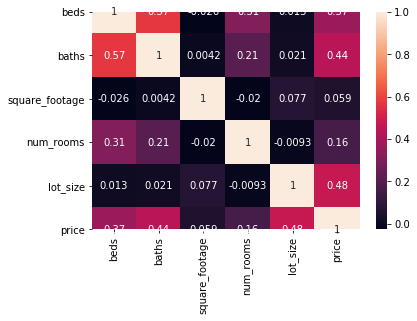

In [11]:
corrMatrix = df_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

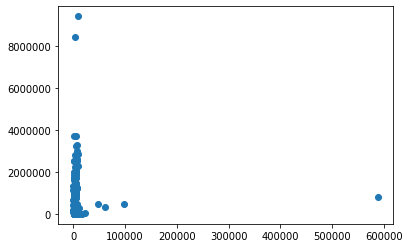

In [12]:
plt.scatter(df_data['square_footage'], df_data['price'])
plt.show()

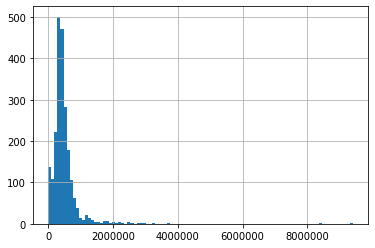

In [13]:
df_data['price'].hist(bins=100)

In [16]:
X = df_data[['beds','baths','square_footage', 'num_rooms', 'lot_size']]
y = df_data['price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15) 

regr = LinearRegression() 

regr.fit(X_train, y_train) 
regr.score(X_test, y_test)

0.5302248057179277

In [69]:
df_zillow = pd.read_csv("/Users/thomasbergamaschi/Downloads/properties_2016.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
len(df_zillow)

2985217